In [1]:
#import the basic library functions 

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('C:/Users/LENOVO/Downloads/Fraud_check.csv')#read the file 
data

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Performing the basic EDA functions on the data set

In [4]:
#using the label encoder function on the different column names to change 

In [5]:
data.loc[data["TaxableIncome"]>=30000,"Income"]="Good"##here iam assuming that the income >30000 as good and other as the risky which given in the data type
data.loc[data["TaxableIncome"]<=30000,"Income"]="Risky"
data

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
label=preprocessing.LabelEncoder()
data['Undergrad']=label.fit_transform(data.Undergrad)
data['MaritalStatus']=label.fit_transform(data['MaritalStatus'])
data['Urban']=label.fit_transform(data.Urban)
data['Income']=label.fit_transform(data.Income)
data

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Undergrad       600 non-null    int32
 1   MaritalStatus   600 non-null    int32
 2   TaxableIncome   600 non-null    int64
 3   CityPopulation  600 non-null    int64
 4   WorkExperience  600 non-null    int64
 5   Urban           600 non-null    int32
 6   Income          600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [8]:
data.describe()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Income
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


In [9]:
data.isna().sum()

Undergrad         0
MaritalStatus     0
TaxableIncome     0
CityPopulation    0
WorkExperience    0
Urban             0
Income            0
dtype: int64

In [10]:
data.nunique()

Undergrad           2
MaritalStatus       3
TaxableIncome     599
CityPopulation    598
WorkExperience     31
Urban               2
Income              2
dtype: int64

0.030014788906377175
-1.1997824607083138


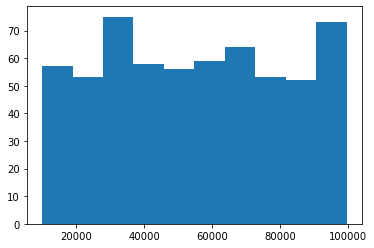

In [11]:
plt.hist(data.TaxableIncome)
print(data.TaxableIncome.skew())
print(data.TaxableIncome.kurt())

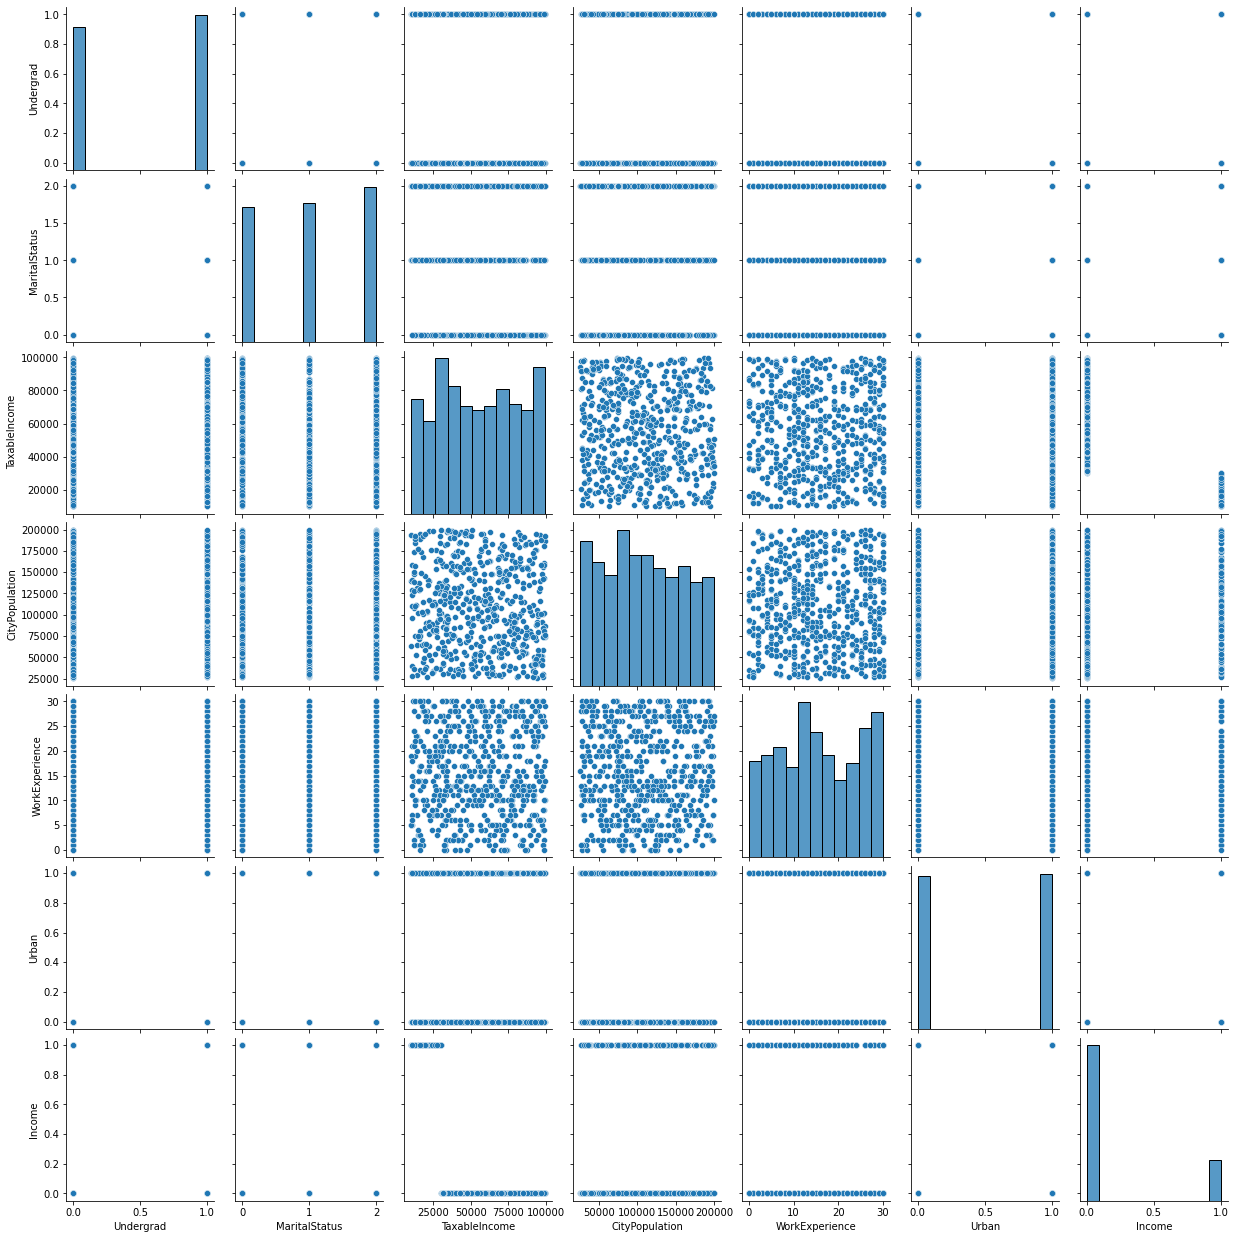

In [12]:
sns.pairplot(data)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

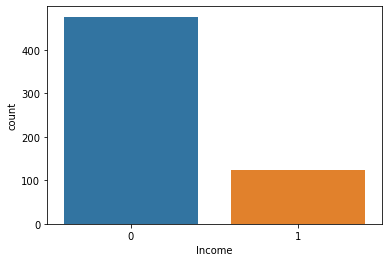

In [13]:
sns.countplot(data.Income)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

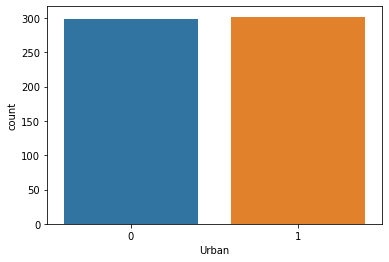

In [14]:
sns.countplot(data.Urban)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

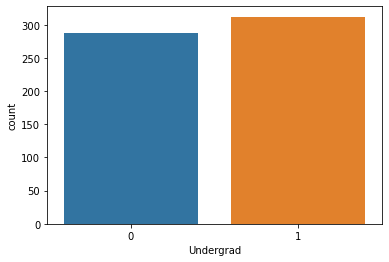

In [15]:
sns.countplot(data.Undergrad)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

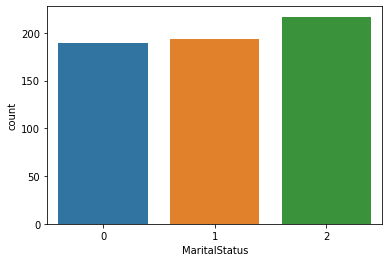

In [16]:
sns.countplot(data.MaritalStatus)

# Developing the model of the Random Forest

In [17]:
x=data.iloc[:,0:5]
y=data.iloc[:,-1]

In [18]:
num_tree=100
max_features=3

In [19]:
kfold=KFold(n_splits=10, random_state=7)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [20]:
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_features)

In [21]:
model.fit(x,y)

RandomForestClassifier(max_features=3)

In [22]:
feature_imp=model.feature_importances_
feature_imp

array([4.02434287e-04, 6.38983423e-04, 9.81692048e-01, 1.07384832e-02,
       6.52805105e-03])

In [23]:
iv=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

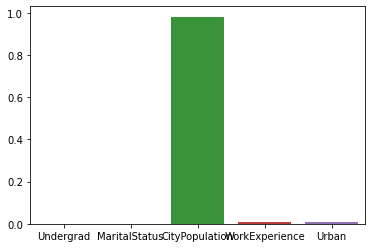

In [24]:
sns.barplot(iv,feature_imp)

In [25]:
accuracy=cross_val_score(model,x,y,cv=kfold)
accuracy

array([1.        , 1.        , 1.        , 1.        , 0.98333333,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [26]:
accuracy.mean()

0.9983333333333334